# INTRODUCTION

In a world where health and security are paramount, the realm of medical insurance plays a pivotal role in safeguarding individuals and families from the uncertainties of life. Imagine unraveling the intricate tapestry of factors that weave together to determine the cost of medical coverage – a pursuit that holds the potential to illuminate the very essence of insurance pricing. Welcome to a journey of exploration and discovery, where data serves as our compass, and insights are the treasures we seek.

# BUSINESS UNDERSTANDING

**Exploring Factors Affecting Medical Insurance Charges**

In the realm of healthcare and financial security, the intricate world of medical insurance pricing stands as a cornerstone. As an analyst, my mission is to delve into the depths of a rich dataset, dissecting the myriad attributes that influence the charges individuals face for their insurance coverage. Through this exploration, I aim to unravel the underlying patterns, relationships, and insights that shape insurance pricing decisions. Our journey of data-driven discovery holds the promise of benefiting both insurance providers and policyholders alike.

**Key Business Questions**

1. **Variable Impact on Charges:** My foremost inquiry revolves around the factors that contribute significantly to the determination of medical insurance charges. Attributes such as age, sex, BMI, number of children, smoking status, and region are potential influencers. By understanding which variables wield the greatest impact, insurance companies can fine-tune their pricing strategies.

2. **Patterns and Trends:** Are there discernible patterns or trends within the data that shed light on how certain attributes interact with insurance charges? Exploring correlations and associations could uncover insights that facilitate informed decision-making in pricing adjustments.

3. **Stakeholder Insights:** My analysis also seeks to provide actionable insights for stakeholders. By quantifying the influence of various attributes on insurance charges, I aim to equip insurance providers with the knowledge required to refine their offerings, enhance customer engagement, and ultimately optimize their business strategies.

4. **Predictive Modeling:** Can I develop predictive models that accurately estimate insurance charges based on the provided attributes? Building reliable models can assist insurance companies in streamlining their underwriting processes and better anticipating potential risks.


**Project Goals**

1. **Attribute Significance:** Identify and quantify the influence of each attribute (age, sex, BMI, etc.) on insurance charges. This involves statistical analysis to discern which attributes have a statistically significant impact.

2. **Insightful Visualizations:** Create visual representations, such as scatter plots, histograms, and box plots, to visually convey relationships between variables and insurance charges. These visuals can help stakeholders grasp patterns and trends more easily.

3. **Regression Analysis:** Utilize regression techniques to build predictive models that estimate insurance charges based on the given attributes. This involves assessing the model's accuracy and understanding the role of each attribute in the predictions.

4. **Interpretation for Stakeholders:** Translate complex statistical findings into clear and actionable insights that insurance providers can leverage. The goal is to facilitate data-driven decision-making in pricing strategies.

# IMPORTATION

In [155]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preparation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Save dump
import joblib

import warnings

warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv('insurance.csv')

In [157]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [158]:
df.shape

(1338, 7)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

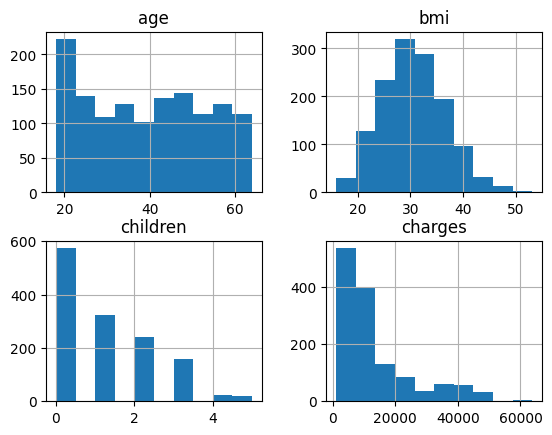

In [161]:
df.hist()

In [162]:
X = df.drop('charges', axis=1)
y = df['charges']

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [164]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [165]:
num_col = X_train.select_dtypes('number').columns
cat_col = X_train.select_dtypes('object').columns

In [166]:
num_col

Index(['age', 'bmi', 'children'], dtype='object')

In [167]:
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [168]:
# Define the preprocessing steps using ColumnTransformer and Pipeline
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat_col),
    ('scaler', StandardScaler(), num_col)
])

In [169]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [170]:
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [171]:
# Perform Model Selection

# Define the models
models = [
    ('OLS', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]


# Initialize lists to store model names, R2 scores, and RMSE scores
model_names = []
r2_scores = []
rmse_scores = []

# Perform cross-validation and calculate R2 and RMSE scores for the models
for model_name, model in models:
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    ev_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='explained_variance')
    
    model_names.extend([model_name] * len(r2))
    r2_scores.extend(r2)
    rmse_scores.extend(rmse)

    print(f"{model_name} - Cross-validated R2 Score: {np.mean(r2):.4f}")
    print(f"{model_name} - Cross-validated RMSE: {np.mean(rmse):.4f}")
    print(f"{model_name} - Cross-validated MAE: {np.mean(-mae_scores):.4f}")
    print(f"{model_name} - Cross-validated Explained Variance Score: {np.mean(ev_scores):.4f}")


OLS - Cross-validated R2 Score: 0.7511
OLS - Cross-validated RMSE: 6026.8016
OLS - Cross-validated MAE: 4227.1859
OLS - Cross-validated Explained Variance Score: 0.7525
Random Forest - Cross-validated R2 Score: 0.8420
Random Forest - Cross-validated RMSE: 4761.8662
Random Forest - Cross-validated MAE: 2659.4349
Random Forest - Cross-validated Explained Variance Score: 0.8446
Gradient Boosting - Cross-validated R2 Score: 0.8577
Gradient Boosting - Cross-validated RMSE: 4556.1305
Gradient Boosting - Cross-validated MAE: 2517.0083
Gradient Boosting - Cross-validated Explained Variance Score: 0.8581


In [172]:
# Create a DataFrame to store the data
data = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores, 'RMSE': rmse_scores})

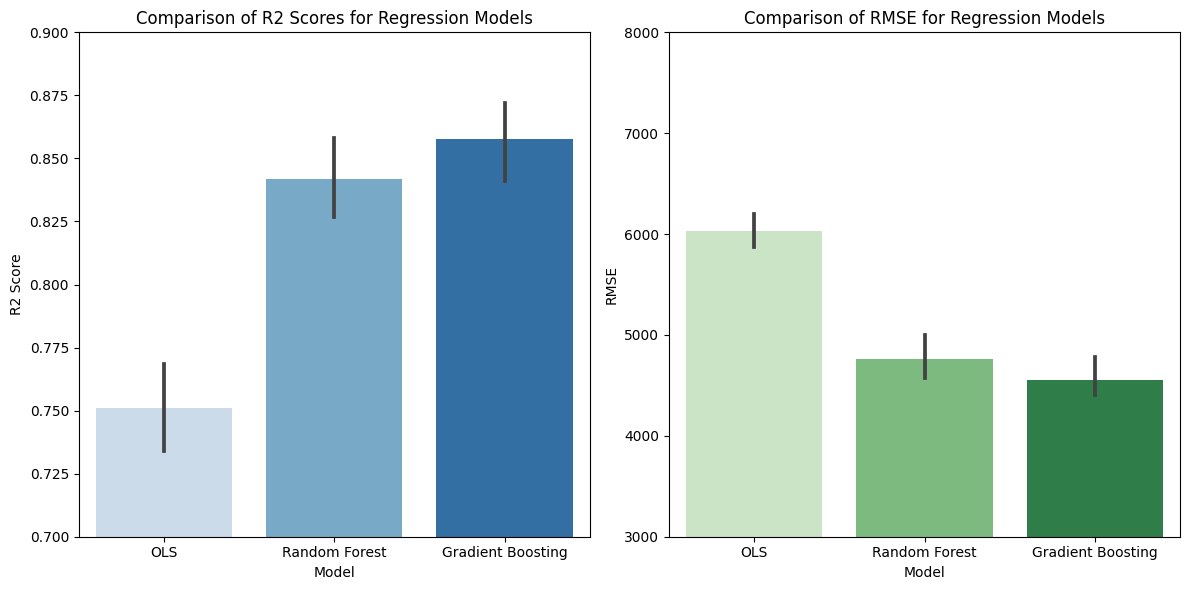

In [173]:
# Create subplots with a row of 1 and column of 2
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the R2 scores
sns.barplot(x='Model', y='R2 Score', data=data, palette='Blues', ax=axes[0])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R2 Score')
axes[0].set_title('Comparison of R2 Scores for Regression Models')
axes[0].set_ylim(0.7, 0.9)  # Adjust the y-axis limits if needed

# Plot the RMSE scores
sns.barplot(x='Model', y='RMSE', data=data, palette='Greens', ax=axes[1])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparison of RMSE for Regression Models')
axes[1].set_ylim(3000, 8000)  # Adjust the y-axis limits if needed

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


In [174]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search to find the best model for Gradient Boosting
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [175]:
# Get the best model
best_gradient_boosting_model = grid_search.best_estimator_

best_gradient_boosting_model

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300)

In [176]:
# Make predictions on the test set using the best model
y_pred = best_gradient_boosting_model.predict(X_test)

y_pred[:5]

array([ 9302.50281779,  4225.19309808, 19981.10910809,  6644.35827079,
        3526.89732076])

In [177]:
# Calculate residuals
residuals = y_test - y_pred

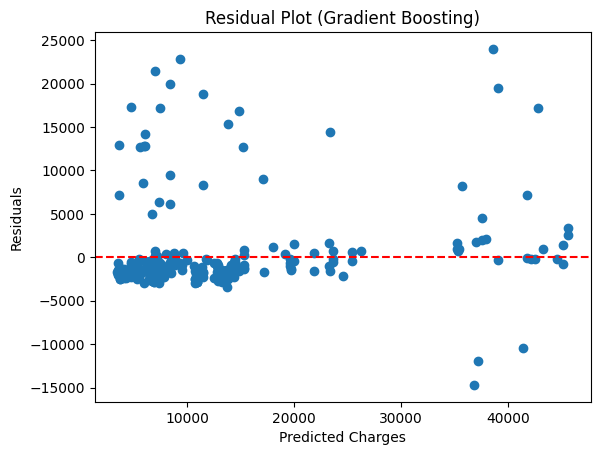

In [178]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting)')
plt.show()

After making the predictions, we can save the best model using joblib


In [179]:
# Save the best_gradient_boosting_model
joblib.dump(best_gradient_boosting_model, 'best_model.joblib')

['best_model.joblib']